## 파이썬 머신러닝
# 범주형 변수

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 지하철 데이터 불러오기
- https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

In [2]:
data = pd.read_csv('CARD_SUBWAY_MONTH_202003.csv')

In [3]:
data.shape

(18265, 7)

In [4]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20200301,경춘선,1320,대성리,277,204,20200304
1,20200301,수인선,1889,숭의,1085,1063,20200304
2,20200301,수인선,1890,신포,503,540,20200304
3,20200301,수인선,1891,인천,398,565,20200304
4,20200301,안산선,1751,산본,5160,5448,20200304


### 노선명 코드화

- 파이썬 고유기능

In [14]:
노선코드 = sorted(list(set(data.노선명)))

In [15]:
노선코드[0]

'1호선'

In [16]:
노선코드.index('7호선')

6

In [24]:
line2i = { name:i  for i,name in enumerate(노선코드)  }
line2i

{'1호선': 0,
 '2호선': 1,
 '3호선': 2,
 '4호선': 3,
 '5호선': 4,
 '6호선': 5,
 '7호선': 6,
 '8호선': 7,
 '9호선': 8,
 '9호선2~3단계': 9,
 '경강선': 10,
 '경부선': 11,
 '경원선': 12,
 '경의선': 13,
 '경인선': 14,
 '경춘선': 15,
 '공항철도 1호선': 16,
 '과천선': 17,
 '분당선': 18,
 '수인선': 19,
 '안산선': 20,
 '우이신설선': 21,
 '일산선': 22,
 '장항선': 23,
 '중앙선': 24}

In [29]:
data['노선코드'] = data.노선명.map(line2i)
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,노선코드
0,20200301,경춘선,1320,대성리,277,204,20200304,15
1,20200301,수인선,1889,숭의,1085,1063,20200304,19
2,20200301,수인선,1890,신포,503,540,20200304,19
3,20200301,수인선,1891,인천,398,565,20200304,19
4,20200301,안산선,1751,산본,5160,5448,20200304,20


In [23]:
i2line = { i:name  for i,name in enumerate(노선코드)  }
i2line

{0: '1호선',
 1: '2호선',
 2: '3호선',
 3: '4호선',
 4: '5호선',
 5: '6호선',
 6: '7호선',
 7: '8호선',
 8: '9호선',
 9: '9호선2~3단계',
 10: '경강선',
 11: '경부선',
 12: '경원선',
 13: '경의선',
 14: '경인선',
 15: '경춘선',
 16: '공항철도 1호선',
 17: '과천선',
 18: '분당선',
 19: '수인선',
 20: '안산선',
 21: '우이신설선',
 22: '일산선',
 23: '장항선',
 24: '중앙선'}

- Numpy

In [17]:
a = data.노선명.values
a

array(['경춘선', '수인선', '수인선', ..., '일산선', '일산선', '일산선'], dtype=object)

In [19]:
노선코드2 = np.unique(a)
노선코드2

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

In [20]:
노선코드2[0]

'1호선'

In [21]:
np.where(노선코드2=='7호선')[0][0]

6

- Pandas

In [26]:
data.노선명.unique()

array(['경춘선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '2호선', '경원선',
       '1호선', '3호선', '4호선', '5호선', '경부선', '경강선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경의선', '경인선', '공항철도 1호선', '과천선', '분당선', '6호선'],
      dtype=object)

In [6]:
lines = np.sort(data.노선명.unique())
lines

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

In [11]:
np.where(lines=='일산선')[0][0]

22

In [10]:
data.노선명.map(lambda s: np.where(lines==s)[0][0])

0        22
1        22
2        22
3        22
4        22
5        22
6        22
7        21
8        21
9        21
10       21
11       21
12       21
13       21
14       21
15       21
16       21
17       21
18       21
19       21
20       20
21       20
22       20
23       20
24       20
25       20
26       20
27       20
28       20
29       20
         ..
17716     0
17717     0
17718     0
17719     0
17720     0
17721     0
17722     0
17723     0
17724     0
17725     0
17726    12
17727     4
17728     1
17729    20
17730    20
17731    20
17732    20
17733    20
17734    20
17735    20
17736    19
17737    19
17738    19
17739    19
17740    19
17741    19
17742    19
17743    19
17744     7
17745    24
Name: 노선명, Length: 17746, dtype: int64

- factorize() : 코드화

In [30]:
data.노선명.factorize(sort=True)

(array([15, 19, 19, ..., 22, 22, 22], dtype=int64),
 Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
        '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선',
        '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
       dtype='object'))

In [12]:
labels, uniques = data.노선명.factorize(sort=True)
display(labels, uniques)

array([22, 22, 22, ..., 19,  7, 24], dtype=int64)

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선',
       '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype='object')

In [13]:
data2 = data.copy()
data2['노선코드'] = labels
data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,노선코드
0,20190501,일산선,1955,마두,8528,8796,20190504,22
1,20190501,일산선,1954,백석,10118,10399,20190504,22
2,20190501,일산선,1953,대곡,1655,1406,20190504,22
3,20190501,일산선,1952,화정,20102,20951,20190504,22
4,20190501,일산선,1951,원당,11419,11064,20190504,22


In [14]:
uniques[data2.노선코드]

Index(['일산선', '일산선', '일산선', '일산선', '일산선', '일산선', '일산선', '우이신설선', '우이신설선',
       '우이신설선',
       ...
       '수인선', '수인선', '수인선', '수인선', '수인선', '수인선', '수인선', '수인선', '8호선', '중앙선'],
      dtype='object', length=17746)

### 노선명 원핫인코딩 (one-hot-encoding)

In [13]:
data.노선명

0        경춘선
1        경춘선
2        경춘선
3        경춘선
4        경춘선
5        경춘선
6        경춘선
7        경춘선
8        경춘선
9        경춘선
10       경춘선
11       경춘선
12       경인선
13       경인선
14       경인선
15       경인선
16       경의선
17       경의선
18       경의선
19       경의선
20       경의선
21       경의선
22       경의선
23       경의선
24       경의선
25       경의선
26       경의선
27       경의선
28       경의선
29       경의선
        ... 
18304    2호선
18305    2호선
18306    2호선
18307    2호선
18308    2호선
18309    2호선
18310    2호선
18311    2호선
18312    2호선
18313    2호선
18314    2호선
18315    2호선
18316    2호선
18317    2호선
18318    2호선
18319    2호선
18320    2호선
18321    2호선
18322    2호선
18323    2호선
18324    2호선
18325    1호선
18326    1호선
18327    1호선
18328    1호선
18329    1호선
18330    1호선
18331    1호선
18332    1호선
18333    1호선
Name: 노선명, Length: 18334, dtype: object

In [32]:
pd.get_dummies(['서울','부산','대구','부산','대전','광주'])

,광주,대구,대전,부산,서울
0,0,0,0,0,1
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
5,1,0,0,0,0


In [10]:
loc = pd.get_dummies(['서울','부산','대구','부산'])
display(loc.columns, loc.values)

Index(['대구', '부산', '서울'], dtype='object')

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [11]:
pd.get_dummies([1,2,2,0,1])

,0,1,2
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0


In [33]:
onehot = pd.get_dummies(data.노선명)
onehot.head()

,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
onehot.columns

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선',
       '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype='object')

In [12]:
onehot.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
onehot.columns

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선',
       '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype='object')

In [19]:
# pd.concat([data, onehot], axis=1).head()
data.join(onehot).head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,1호선,2호선,3호선,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
0,20190501,일산선,1955,마두,8528,8796,20190504,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20190501,일산선,1954,백석,10118,10399,20190504,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,20190501,일산선,1953,대곡,1655,1406,20190504,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,20190501,일산선,1952,화정,20102,20951,20190504,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20190501,일산선,1951,원당,11419,11064,20190504,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
data2 = pd.get_dummies(data, columns=['노선명'], prefix='line', prefix_sep='-') # prefix='', prefix_sep=''
data2.head()

,사용일자,역ID,역명,승차총승객수,하차총승객수,등록일자,노선코드,line-1호선,line-2호선,line-3호선,...,line-경춘선,line-공항철도 1호선,line-과천선,line-분당선,line-수인선,line-안산선,line-우이신설선,line-일산선,line-장항선,line-중앙선
0,20200301,1320,대성리,277,204,20200304,15,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,20200301,1889,숭의,1085,1063,20200304,19,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,20200301,1890,신포,503,540,20200304,19,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,20200301,1891,인천,398,565,20200304,19,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20200301,1751,산본,5160,5448,20200304,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
data2.columns

Index(['사용일자', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자', '노선명_1호선', '노선명_2호선',
       '노선명_3호선', '노선명_4호선', '노선명_5호선', '노선명_6호선', '노선명_7호선', '노선명_8호선',
       '노선명_9호선', '노선명_9호선2~3단계', '노선명_경강선', '노선명_경부선', '노선명_경원선', '노선명_경의선',
       '노선명_경인선', '노선명_경춘선', '노선명_공항철도 1호선', '노선명_과천선', '노선명_분당선', '노선명_수인선',
       '노선명_안산선', '노선명_우이신설선', '노선명_일산선', '노선명_장항선', '노선명_중앙선'],
      dtype='object')

### 연습문제

- 아이리스의 타겟값을 아래와 같이 변경하시오.<br>
(결과는 numpy array)
```
0 => 1 0 0
1 => 0 1 0
2 => 0 0 1
```

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

In [11]:
y = np.zeros([150,3])
for i in range(150):
    y[i,iris.target[i]] = 1
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [29]:
pd.get_dummies([1,2,2,0]).values

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [10]:
pd.get_dummies(iris.target).values

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [12]:
np.eye(3)[iris.target]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

- 'Setosa', 'Versicolor', 'Virginica' 로 타겟값을 변경하시오.

In [15]:
#label = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
label = ['Setosa', 'Versicolor', 'Virginica']
y = [label[t] for t in iris.target]
y

['Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',


In [16]:
label = np.array(['Setosa', 'Versicolor', 'Virginica'])
label[iris.target]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [17]:
label = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
pd.Series(iris.target).map(label)

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
5         Setosa
6         Setosa
7         Setosa
8         Setosa
9         Setosa
10        Setosa
11        Setosa
12        Setosa
13        Setosa
14        Setosa
15        Setosa
16        Setosa
17        Setosa
18        Setosa
19        Setosa
20        Setosa
21        Setosa
22        Setosa
23        Setosa
24        Setosa
25        Setosa
26        Setosa
27        Setosa
28        Setosa
29        Setosa
         ...    
120    Virginica
121    Virginica
122    Virginica
123    Virginica
124    Virginica
125    Virginica
126    Virginica
127    Virginica
128    Virginica
129    Virginica
130    Virginica
131    Virginica
132    Virginica
133    Virginica
134    Virginica
135    Virginica
136    Virginica
137    Virginica
138    Virginica
139    Virginica
140    Virginica
141    Virginica
142    Virginica
143    Virginica
144    Virginica
145    Virginica
146    Virginica
147    Virgini

- 역명을 코드표로 만드시오

In [26]:
i2station = {i:name for i, name in enumerate(np.sort(data.역명.unique()))}

In [25]:
station2i = {name:i for i, name in enumerate(np.sort(data.역명.unique()))}

### 역코드표 만들기

In [25]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190501,일산선,1955,마두,8528,8796,20190504
1,20190501,일산선,1954,백석,10118,10399,20190504
2,20190501,일산선,1953,대곡,1655,1406,20190504
3,20190501,일산선,1952,화정,20102,20951,20190504
4,20190501,일산선,1951,원당,11419,11064,20190504


In [30]:
역코드표 = data[['역ID','역명','노선명']].drop_duplicates().sort_values('역ID').reset_index(drop=True)
역코드표

,역ID,역명,노선명
0,150,서울역,1호선
1,151,시청,1호선
2,152,종각,1호선
3,153,종로3가,1호선
4,154,종로5가,1호선
5,155,동대문,1호선
6,156,신설동,1호선
7,157,제기동,1호선
8,158,청량리(서울시립대입구),1호선
9,159,동묘앞,1호선


In [36]:
역코드표[역코드표.역명=='종로3가']

,역ID,역명,노선명
3,153,종로3가,1호선
72,319,종로3가,3호선
401,2535,종로3가,5호선


In [27]:
data2 = data[['사용일자','역ID','승차총승객수','하차총승객수']]
data2.head()

,사용일자,역ID,승차총승객수,하차총승객수
0,20190501,1955,8528,8796
1,20190501,1954,10118,10399
2,20190501,1953,1655,1406
3,20190501,1952,20102,20951
4,20190501,1951,11419,11064


In [28]:
data2.merge(역코드표, on='역ID').head()

,사용일자,역ID,승차총승객수,하차총승객수,역명,노선명
0,20190501,1955,8528,8796,마두,일산선
1,20190502,1955,10541,10974,마두,일산선
2,20190503,1955,10666,10970,마두,일산선
3,20190504,1955,7869,7900,마두,일산선
4,20190505,1955,5816,5786,마두,일산선


### 사용일자-노선명 피벗테이블 만들기

In [29]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190501,일산선,1955,마두,8528,8796,20190504
1,20190501,일산선,1954,백석,10118,10399,20190504
2,20190501,일산선,1953,대곡,1655,1406,20190504
3,20190501,일산선,1952,화정,20102,20951,20190504
4,20190501,일산선,1951,원당,11419,11064,20190504


In [37]:
pv = data.pivot_table(values='승차총승객수', index='사용일자', columns='노선명',
                      aggfunc='sum')
pv.head()

노선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
사용일자,,,,,,,,,,,,,,,,,,,,,
20200301,59140,362436,126502,145602,148881,103229,187071,50752,63730,19649,...,11643,34439,21967,85974,13003,36638,15515,29949,3104,30594
20200302,169422,1040327,368999,379087,457421,250340,534018,139210,194738,64213,...,24327,69874,69557,242376,30606,87953,31806,77261,5377,64468
20200303,168761,1046573,368610,378065,457924,251788,537025,141483,194175,63489,...,23412,68768,70912,243306,30790,87610,31593,77694,5138,64662
20200304,166051,1048676,367203,376522,453708,252268,534784,142621,196186,64265,...,22833,67811,70447,244973,30385,85863,31240,76687,5225,62962
20200305,167124,1058344,370754,376632,455627,252758,535129,142612,197283,64304,...,23417,68355,71228,244145,30679,86748,31068,77874,5167,63552


### 날자 코드화

In [64]:
pd.to_datetime(data.사용일자, format='%Y%m%d')

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
5       2019-01-01
6       2019-01-01
7       2019-01-01
8       2019-01-01
9       2019-01-01
10      2019-01-01
11      2019-01-01
12      2019-01-01
13      2019-01-01
14      2019-01-01
15      2019-01-01
16      2019-01-01
17      2019-01-01
18      2019-01-01
19      2019-01-01
20      2019-01-01
21      2019-01-01
22      2019-01-01
23      2019-01-01
24      2019-01-01
25      2019-01-01
26      2019-01-01
27      2019-01-01
28      2019-01-01
29      2019-01-01
           ...    
18304   2019-01-31
18305   2019-01-31
18306   2019-01-31
18307   2019-01-31
18308   2019-01-31
18309   2019-01-31
18310   2019-01-31
18311   2019-01-31
18312   2019-01-31
18313   2019-01-31
18314   2019-01-31
18315   2019-01-31
18316   2019-01-31
18317   2019-01-31
18318   2019-01-31
18319   2019-01-31
18320   2019-01-31
18321   2019-01-31
18322   2019-01-31
18323   2019-01-31
18324   2019-01-31
18325   2019

In [14]:
pd.to_datetime(['1/1/2018', '5/3/2019'])

DatetimeIndex(['2018-01-01', '2019-05-03'], dtype='datetime64[ns]', freq=None)

In [38]:
data2 = data.copy()
data2['일자'] = pd.to_datetime(data.사용일자, format='%Y%m%d')
data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,일자
0,20200301,경춘선,1320,대성리,277,204,20200304,2020-03-01
1,20200301,수인선,1889,숭의,1085,1063,20200304,2020-03-01
2,20200301,수인선,1890,신포,503,540,20200304,2020-03-01
3,20200301,수인선,1891,인천,398,565,20200304,2020-03-01
4,20200301,안산선,1751,산본,5160,5448,20200304,2020-03-01


In [39]:
data2.일자.dt.dayofweek

0        6
1        6
2        6
3        6
4        6
5        6
6        6
7        6
8        6
9        6
10       6
11       6
12       6
13       6
14       6
15       6
16       6
17       6
18       6
19       6
20       6
21       6
22       6
23       6
24       6
25       6
26       6
27       6
28       6
29       6
        ..
18235    1
18236    1
18237    1
18238    1
18239    1
18240    1
18241    1
18242    1
18243    1
18244    1
18245    1
18246    1
18247    1
18248    1
18249    1
18250    1
18251    1
18252    1
18253    1
18254    1
18255    1
18256    1
18257    1
18258    1
18259    1
18260    1
18261    1
18262    1
18263    1
18264    1
Name: 일자, Length: 18265, dtype: int64

In [25]:
data2['년'] = data2.일자.dt.year
data2['월'] = data2.일자.dt.month
data2['일'] = data2.일자.dt.day
data2['wday'] = data2.일자.dt.weekday
data2['wname'] = data2.일자.dt.weekday_name

data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,일자,년,월,일,wday,wname
0,20190501,일산선,1955,마두,8528,8796,20190504,2019-05-01,2019,5,1,2,Wednesday
1,20190501,일산선,1954,백석,10118,10399,20190504,2019-05-01,2019,5,1,2,Wednesday
2,20190501,일산선,1953,대곡,1655,1406,20190504,2019-05-01,2019,5,1,2,Wednesday
3,20190501,일산선,1952,화정,20102,20951,20190504,2019-05-01,2019,5,1,2,Wednesday
4,20190501,일산선,1951,원당,11419,11064,20190504,2019-05-01,2019,5,1,2,Wednesday


In [27]:
data2['요일'] = data2.일자.dt.weekday.map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})
data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,일자,년,월,일,wday,wname,요일
0,20190501,일산선,1955,마두,8528,8796,20190504,2019-05-01,2019,5,1,2,Wednesday,수
1,20190501,일산선,1954,백석,10118,10399,20190504,2019-05-01,2019,5,1,2,Wednesday,수
2,20190501,일산선,1953,대곡,1655,1406,20190504,2019-05-01,2019,5,1,2,Wednesday,수
3,20190501,일산선,1952,화정,20102,20951,20190504,2019-05-01,2019,5,1,2,Wednesday,수
4,20190501,일산선,1951,원당,11419,11064,20190504,2019-05-01,2019,5,1,2,Wednesday,수


In [28]:
pv = data2.pivot_table('승차총승객수', '노선명', '요일', 'mean')[['월','화','수','목','금','토','일']]
pv

요일,월,화,수,목,금,토,일
노선명,,,,,,,
1호선,27004.100000,30359.125000,29533.740000,30743.320000,32406.860000,29123.633333,19207.925000
2호선,30231.815000,34868.635000,33421.420000,35579.176000,37354.964000,28709.086667,20080.175000
3호선,16574.095588,19020.362963,18206.429412,19171.982353,20445.041176,16438.792079,11155.837037
4호선,22321.230769,25476.326923,24956.146154,25903.315385,26914.984615,21446.294872,15271.836538
5호선,12127.504902,14044.039216,13496.494118,14143.435294,14614.164706,10598.607843,7306.985294
6호선,9572.480000,11246.027027,10720.920213,11210.582888,11493.500000,9055.725664,6436.586667
7호선,14594.514706,16793.156863,15906.486275,16796.556863,17275.098039,12411.287582,9087.485294
8호선,11469.014706,13308.705882,12741.011765,13311.764706,13811.823529,10242.411765,7158.926471
9호선,10942.480000,12716.220000,11974.800000,12767.552000,13492.952000,9486.400000,6716.600000


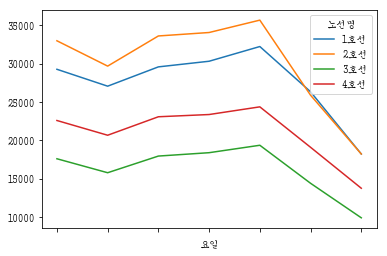

In [113]:
import matplotlib
from matplotlib import font_manager, rc
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/uni_hsr.ttf").get_name()
# h2gprm.ttf, uni_hsr.ttf, hynaml.ttf, nanumgothic.ttf
rc('font', family=font_name)

pv[:4].T.plot()

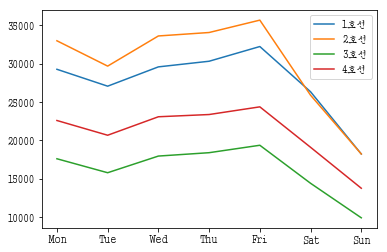

In [114]:
plt.plot(pv[:4].values.T)
plt.xticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend(['1호선','2호선','3호선','4호선'])
# plt.legend(['line-1','line-2','line-3','line-4'])

### 숫자 원핫인코딩

In [87]:
from sklearn.datasets import load_iris

iris = load_iris()
X = np.c_[iris.data, iris.target]
X.shape

(150, 5)

In [92]:
pd.get_dummies(iris.target)

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [91]:
pd.get_dummies(pd.DataFrame(X), columns=[4])

,0,1,2,3,4_0.0,4_1.0,4_2.0
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


In [93]:
np.eye(3)[iris.target]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [94]:
np.c_[iris.data, np.eye(3)[iris.target]]

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

### 승객수별 분포 (테스트)

In [31]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190501,일산선,1955,마두,8528,8796,20190504
1,20190501,일산선,1954,백석,10118,10399,20190504
2,20190501,일산선,1953,대곡,1655,1406,20190504
3,20190501,일산선,1952,화정,20102,20951,20190504
4,20190501,일산선,1951,원당,11419,11064,20190504


In [40]:
ser = data.groupby('역명').승차총승객수.sum().sort_values()
ser.head()

역명
임진강     460
지평     1030
백양리    1931
달월     1962
굴봉산    2911
Name: 승차총승객수, dtype: int64

In [41]:
ser.tail()

역명
홍대입구        1397888
선릉          1449575
신림          1498306
잠실(송파구청)    1777883
강남          1880213
Name: 승차총승객수, dtype: int64

In [75]:
ser.shape

(509,)

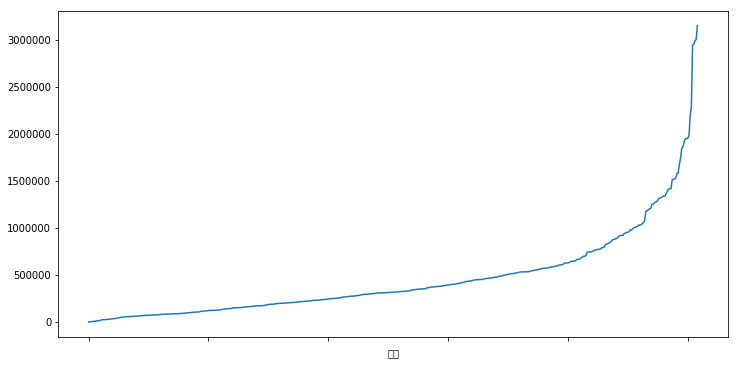

In [76]:
ser.plot(figsize=[12,6])

In [80]:
l = ser.values

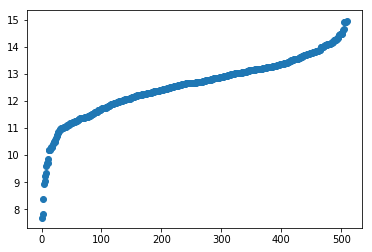

In [93]:
plt.scatter(range(1,len(ser)+1), np.log(l))

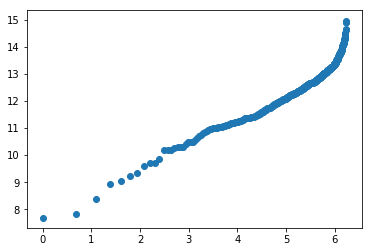

In [84]:
plt.scatter(np.log(range(1,len(ser)+1)), np.log(l))

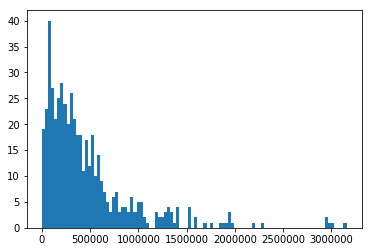

In [86]:
plt.hist(l, bins=100)
pass

In [87]:
cnt = np.histogram(l, bins=100)[0]
cnt

array([19, 23, 40, 27, 21, 25, 28, 24, 20, 26, 21, 18, 18, 11, 17, 12, 18,
       10, 14,  9,  7,  5,  3,  6,  7,  3,  4,  4,  3,  6,  3,  5,  5,  2,
        1,  0,  0,  3,  2,  2,  3,  4,  3,  1,  4,  0,  0,  0,  4,  0,  2,
        0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  3,  1,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  1,  1,  0,  0,  0,  1],
      dtype=int64)

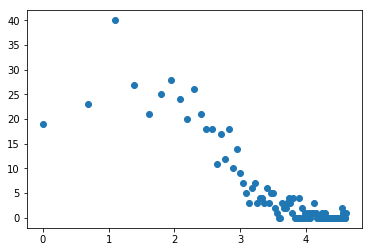

In [88]:
plt.scatter(np.log(range(1,len(cnt)+1)),cnt)

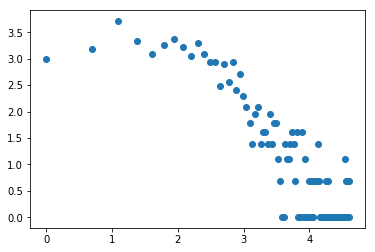

In [89]:
plt.scatter(np.log(range(1,len(cnt)+1)),np.log(cnt+1))

In [90]:
X = np.log(range(1,len(cnt)+1)).reshape(-1,1)
y = np.log(cnt+1)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
w = model.coef_[0]
b = model.intercept_
w,b

(-1.1069880560766356, 5.094909956493281)

(-0.2544086021505377,
 5.145448028673836,
 -0.6005435920210096,
 5.366122030232058)

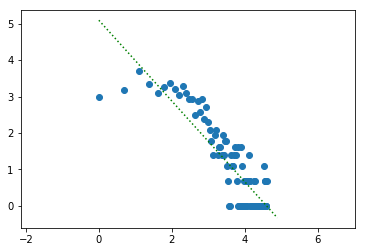

In [92]:
plt.scatter(np.log(range(1,len(cnt)+1)),np.log(cnt+1))
xs = np.arange(0,5,0.1)
plt.plot(xs, w*xs + b, 'g:')
plt.axis('equal')